# Structured Prediction Exercises

In the lecture we have looked at a simple toy structured prediction application and model. In this exercise you will change and improve it. 

##  <font color='green'>Setup 1</font>: Load Libraries

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..")
import statnlpbook.util as util
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

## <font color='blue'>Task 1</font>: Different Representation
Find a different representation and model that also achieves perfect accuracy. 

In [3]:
import math
import numpy as np

x_space = ['I ate an apple', 
           'I ate a red apple', 
           'Yesterday I ate a red apple', 
           'Yesterday I ate a red apply with a friend']
y_space = ['Ich aß einen Apfel',
           'Ich aß einen roten Apfel',
           'Gestern aß ich einen roten Apfel',
           'Gestern aß ich einen roten Apfel mit einem Freund']
data = list(zip(x_space,y_space))
train = data[:2]
test = data[2:]

def f(x):
    """Calculate a representation of the input `x`."""
    return len(x)
def g(y):
    """Calculate a representation of the output `y`."""
    return len(y)

def s(theta,x,y):
    """Measure the compatibility of sentences `x` and `y` using parameter `theta`"""
    return -abs(theta * f(x) - g(y))

def loss(theta, data):
    """Measure the total number of errors made when predicting with parameter `theta` on training set `data`"""
    total = 0.0
    for x,y in data:
        max_score = -math.inf
        result = None
        for y_guess in y_space:
            score = s(theta,x,y_guess)
            if score > max_score:
                result = y_guess
                max_score = score
        if result != y:
            total += 1.0
    return total


thetas = np.linspace(0.0, 2.0, num=1000)
theta_star = thetas[np.argmin([loss(theta,train) for theta in thetas])]

def predict(theta, x):
    """Find the most compatible output sentence given the input sentence `x` and parameter `theta`"""
    max_score = -math.inf
    result = None
    for y_guess in y_space:
        score = s(theta,x,y_guess)
        if score > max_score:
            result = y_guess
            max_score = score
    return result

util.Table([(x,predict(theta_star, x)) for x,_ in test])

Yesterday I ate a red apple,Gestern aß ich einen roten Apfel
Yesterday I ate a red apply with a friend,Gestern aß ich einen roten Apfel mit einem Freund


## <font color='blue'>Task 2</font>: Smoother Objective

Can you find a "smoother" objective that is continuous and has optima that also optimise the original objective?

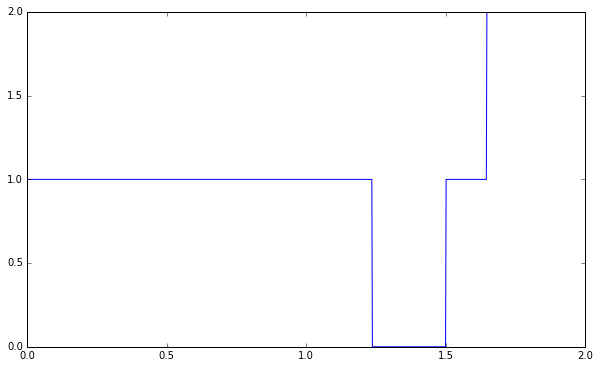

In [4]:
def my_loss(theta, data):
    """Measure the total number of errors made when predicting with parameter `theta` on training set `data`"""
    total = 0.0
    for x,y in data:
        max_score = -math.inf
        result = None
        for y_guess in y_space:
            score = s(theta,x,y_guess)
            if score > max_score:
                result = y_guess
                max_score = score
        if result != y:
            total += 1.0
    return total

plt.plot(thetas, [my_loss(theta,train) for theta in thetas])

## Solutions

You can find the solutions to this exercises [here](structured_prediction_solutions.ipynb)